<img src="logo-2020.png" alt="logo" width="150"/>

---
# Problem Set 4 Notebook 3 
## Introduction to Deep Learning  (5 points total)

## Instructions

Problem set 4, ps4, consists of three notebooks:

    ps4_nb1.ipynb
    ps4_nb2.ipynb
    ps4_nb3.ipynb  

### Instructor

- Prof. Dr. Gregory Wheeler (`g.wheeler@fs.de`)


---

In this exercise you will build a <b>classifier for articles of clothing</b> using the [keras library](https://keras.io/) to construct a neural network.  This exercise works with the <b>Fashion MNST</b> dataset, a data set of 60,000 greyscale 28x28 pixel images of ten different types clothes.

Building (deep) neural networks with keras is very straightforward. The complications typically come from tuning the models and a need to shrewdly manage your computational resources.


## Overview 

In this exercise you will use a simple validation set accuracy score `val_accuracy` to guide you in tuning the parameters of your model.  In practice, of course, one would optimize many different parameters -- such as which loss function to use, which activation function, the drop out rate, the number of layers, the number of units per layer, momentum, and which optimization algorithm to use, and tuning parameters for that algorithm.  In this exercise we will focus on just a couple of parameters that are particular to neural networks.


After loading libraries and formatting data in the first three sections, section IV, <b>Build and Train your Model</b>, includes three steps that are at the core of the assignment: 

  - <b>Step 1.</b> _Specify a Densely Connected Sequential Model Network._ This is performed by `buildSequentialModel()`, which is __a function  you complete__ to specify how many `layers` your model will have,  the number of `units` per layer, and the `dropout` rate of each layer. A template is provided that specifies other parameters that are fixed for the assignment, such as the kind of network, the activation functions, and some formatting.
  
  
  - __Step 2.__ _Instantiate and Compile the Model_.  This __code is written for you__. This step instantiates a model according to the specifications you provide by `buildSequentialModel()` and compiles a model according to an optimizer, loss function, and performance metric -- all of which are set for you to standardize grading.  (In practice, however, selecting an optimizer and loss function are an additional hyperparamters that you would need to select to tune your model, and the choice of performance metric would depend on the objectives of the model.)
  
  
  - __Step 3.__ _Train the Model_. This is performed by the `model.fit()` method, where __you choose__ the `epoch` and `batch_size`.  Sample values are provided for you.  

Steps 4 and 5 outline how you might evaluate your model with an eye to improving the performance. 

Finally, in section V, your task is to specify a model architecture and dropout rates with `buildSequentialModel()`  and hyperparameters for that model in `myDeepNetworkParameters()` to achive the highest `val_accuracy` score you can. 

---


## I. Loading libraries

Import keras and the relevant packages to build a dense sequential model.  Additionally, you will import `Dropout`, a keras package for regularization;  `Activation`, which allows for a wider range of options for initializing the initial parameter matrix weights; and `Flatten`, which allows you to unroll $m\times n$ pixel images to vectors of length $(m\times n)$.  We also will use some keras utilities from `np_utils`.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from livelossplot import PlotLossesKeras
# import keras models
from tensorflow import keras
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.utils import np_utils

ModuleNotFoundError: No module named 'livelossplot'

Next, the random seed is fixed to ensure replicability.

In [ ]:
# set random seed globally
my_seed = 21
from numpy.random import seed
seed(my_seed)
import tensorflow as tf
tf.random.set_seed(my_seed) 
# tensorflow version
print(tf.__version__)

### The Fashion MINST data set 

The <b>Fashion-MNIST</b> data set consists of 60,000 greyscale images of clothing items from [Zalando](https://jobs.zalando.com/en/tech/?gh_src=281f2ef41us). Each example is a 28x28 pixel image associated with a label from 10 categories:

| Label | Description |
|-------|-------------|
|   0   | T-shirt/Top |
|   1   | Trousers    |
|   2   | Pullover    |
|   3   | Dress       |
|   4   | Coat        |
|   5   | Sandal      |
|   6   | Shirt       |
|   7   | Sneaker     |
|   8   | Bag         |
|   9   | Ankle Boot  |


Here is a sample from the data set which displays three rows of examples per class:

<img src="ps4_fig04-fashion-mnist.png" width="750"/>


Conveniently, the Fashion MNIST data set, called `fashion_mnist`, is included in the keras library. Import it from `keras.datasets` in the next cell.

In [ ]:
# import fashion mnst dataset
from keras.datasets import fashion_mnist

Next, define the number of classes for your classifier.  There are ten types of clothing articles in the database. The variable `nb_classes` will be used to set the total number of classes.  

In [ ]:
# Set the total number of classes
nb_classes = 10

Now you are ready to prepare the data by defining a training set `X_train`, `y_train` and a test set `X_test`, `y_test` from the data set `fashion_mnist` that you loaded from `keras.datasets`.  

Running the next cell does this for you.

In [2]:
# the data, shuffled and split between train and test sets
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print("X_train original shape of images", X_train.shape)
print("y_train original shape of label vector", y_train.shape)

NameError: name 'fashion_mnist' is not defined

## II. Visualize your data
Next, inspect your data.  Running the next cell will display the first 12 images from the fashion mnist data set, arranged in a 3 x 4 grid.

NameError: name 'X_train' is not defined

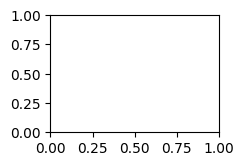

In [3]:
# inspect your data
from matplotlib.pyplot import figure
plt.figure(figsize= (10,7))
for ii in range(12):
    plt.subplot(3,4,ii+1)
    plt.subplots_adjust(hspace=0.8)
    plt.imshow(X_train[ii], cmap='gray', interpolation='none')
    plt.title("Class {}".format(y_train[ii]))

## III. Format your data
Your training set consists of 60,000 images, each 28 x 28 pixels. Greyscale pixel values range between 0 (black) and 255 (white). The next block of code rescales pixel values to a float between 0 (black) and 1 (white).

~~~python
# Format training set
X_train = X_train.astype('float32')
X_train = X_train/255

# Format test set
X_test = X_test.astype('float32')
X_test = X_test/255

print("Training matrix shape", X_train.shape)
print("Testing matrix shape", X_test.shape)
~~~


In [178]:
# standardize training set
X_train = X_train.astype('float32')
X_train = X_train/255

# standardize test set 
X_test = X_test.astype('float32')
X_test = X_test/255

print("Training matrix shape is", X_train.shape)
print("Testing matrix shape is", X_test.shape)

Training matrix shape is (60000, 28, 28)
Testing matrix shape is (10000, 28, 28)


## IV. Build and Train your Model 


### STEP 1. Specify a densley connected sequential network

Your task is to build a densely connected sequential model in keras that has <b>one input layer</b> with 784 nodes, some number of hidden layers with <b>ReLU activation</b> functions for all nodes in each hidden layer, and a 10-node <b>ouput layer</b> with <b>sofmax activation</b> functions for all 10 nodes.  You may use [Dropout regularization](https://machinelearningmastery.com/dropout-regularization-deep-learning-models-keras/) for each layer except the input and output layers.  The dropout [rate](https://keras.io/api/layers/regularization_layers/dropout/) is a number between 0 and 1 denoting proportion of units of a layer to ignore in the corresponding layer being ignored in training.  You will also need to specify the number of nodes in each layer -- the `-1-` argument in the template, below.  

~~~python
def buildSequentialModel():
    # Build a Sequential Model.
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))

    #-- TEMPLATE 
    ##- Input Layer and First Hidden Layer
    model.add(Dense(-1-, kernel_initializer='normal', activation='relu'))

    ##- Second Hidden Layer (etc.)
    model.add(---)

    # Output Layer
    model.add(Dense(10, activation='softmax'))
    
    return model

~~~
The first line specifies the input layer and the first hidden layer of the model.  Keras expects you to specify the dimension of the input, which is 28x28 that we unroll to a vector of length 784 using the method `Flatten(input_shape = (m, n))`.  For example, suppose we have a data set of $4 \times 5$ grey scale images of geometric shapes.  Intuitively, the following picture illustrates an $4 \times 5$ image of a triangle and the corresponding 20-d "flattened" vector:

<img src="ps4_fig03.png" alt="flatten" width="550"/>


<b>You will be building `Dense`, `Sequential()` models only.</b>  

You may add `Dropout` regularization to the hidden layers using `model.add(Dropout(-p-)`, where `-p-` is a probability. As a rough guide, no more than 3 hidden layers should suffice for this assignment.

The last layer is the output layer, which uses `activation = 'softmax'` since we have 10 classes. 

In [179]:
def buildSequentialModel():
    # Build a Sequential Model.
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    
    # YOUR CODE HERE
    model.add(Dense(500, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.2))
    
    model.add(Dense(350, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.15))

    # Output Layer
    model.add(Dense(10, activation='softmax'))
   
    return model

### STEP 2.  Instantiate and Compile the Model

You have been introduced to gradient descent and the BFGS algorithm.  For this assignment, you will use the <i>adaptive moment estimation</i> algorithm, which is commonly referred to simply as <b>Adam</b>. Adam has been shown to work very well across a wide range of deep learning architectures.  

As for the loss function, we will use <i>categorical crossentropy</i>. Actually, you've seen this cost function in the binomial form:  the cost function we used for logistic regression in binary classification problems is a special case of categorical crossentropy. The learning rate has been set for you to `0.001`. 

Finally, we will measure the performance of our models by their accuracy.  Thus, the metric we will use is simply `'accuracy'`.

~~~python
# compile model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                loss=keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])
~~~

The next cell instantiates your model with `buildSequentialModel()` then compiles your model using the adam optimizer with a learning rate of 0.001 with categorical crossentropy as the loss function and accuracy as the performance metric.

In [180]:
# instantiate model
model = buildSequentialModel()
# compile model
#model.compile(loss='categorical_crossentropy', optimizer='adam')
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                loss=keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])


### STEP 3. Train the Model  
Now we are ready to train the model.  This step, as we saw in recent assignments, will take some time.  We have set the epochs, to 2 to minimize unnecessary computations involved in distributing the notebooks to you, but epochs can be expected to range between 10 and 50.  We also set a relatively high batch size of 1000, again solely for computational reasons.  

There is a trade-off between batch size and number of epochs such that the smaller batch size the smaller the maximum number of epochs you can afford to compute, and the larger the batch size the higher the maximum number of epochs you can run.    

Since we have <b>validation data</b>, you should include the optional parameter `validation_data=(X_test, Y_test)`.

~~~python
model.fit(X_train, Y_train, 
          batch_size = 1024, epochs=2, verbose=1, 
          validation_data=(X_test, y_test))
~~~

The code in the next cell can be modified by you to vary the `batch_size` and `epochs`.

In [181]:
model.fit(X_train, y_train,
          batch_size=1024, epochs=2, verbose=1,
          validation_data=(X_test, y_test))

Epoch 1/2
59/59 [==============================] - 1s 17ms/step - loss: 0.7028 - accuracy: 0.7541 - val_loss: 0.4722 - val_accuracy: 0.8345
Epoch 2/2
59/59 [==============================] - 1s 14ms/step - loss: 0.4358 - accuracy: 0.8451 - val_loss: 0.4116 - val_accuracy: 0.8543


The way to read the output from each epoch, from left to right, is:

- `_s _ms/step` the time in seconds and milliseconds per step.
-  `loss:` computes the cross-entropy score on the training data; 
- `accuracy:` computes the traning accuracy
- `val_loss` computes the cross-entropy loss on the test/validation set .
- `val_accuracy`: computes the accuracy score on the test/validation set.

For this exercise, we will evaluate the performance of your model solely by its final `val_accuracy` score.

Note that the `model.fit` is using the cross-entropy score as the loss function for optimization. You will recall from earlier lectures that `loss` and `val_loss` will vary and `accuracy` and `val_accuracy` will vary, giving you some insight into when your model underfits or overfits the data. 

### STEP 4. Evaluate Model
The next step is to evaluate the performance of your model. Here we are primarily interested in minimizing cross validation (CV) error, which is the variable `val_loss`.  To see the full test score, run the next cell.

~~~python
#scores = model.evaluate(X_test, Y_test, verbose=0)
score = model.evaluate(X_test, Y_test, verbose=1)
print('Your CV accuracy score is:', score)
~~~

In [182]:
#scores = model.evaluate(X_test, Y_test, verbose=0)
score = model.evaluate(X_test, y_test, verbose=1)
print('Your CV accuracy score is:', score[1])


313/313 [==============================] - 0s 1ms/step - loss: 0.4116 - accuracy: 0.8543
Your CV accuracy score is: 0.8543000221252441


### STEP 5.  Inspect the output
To get a sense of the performance of the model, let us inspect the cases that it misclassified in the validation set.  Recall that the validation set was <i>not</i> included in training;  from the point of view of the algorithm, these 10,000 images were new images, albeit drawn from the same population as the training data.  Thus, for our purposes, the validation set is functioning as a proper test set.  We may speak then of the "cv/test set".


In [183]:
# The predict_classes function outputs the highest probability class
# according to the trained classifier for each input example.
predicted_classes = np.argmax(model.predict(X_test), axis=-1)


# Identify which examples were correctly and incorrectly classified.
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

# Count the number of incorrectly classified examples of 10,000 test cases
len(incorrect_indices)
print("Your classifier got the following " + str(len(incorrect_indices)) + " items wrong out of 10,000:")
incorrect_indices

Your classifier got the following 1457 items wrong out of 10,000:


array([  12,   17,   21, ..., 9979, 9985, 9989])

We discussed in class how inspecting the cases a classifier gets wrong might give you insights into how to modify your model.  So, let's plot a 3 x 4 table of correctly classified examples followed by a 3 x 4 table of incorrectly classified examples. 

Examples of Correctly Classified Items:


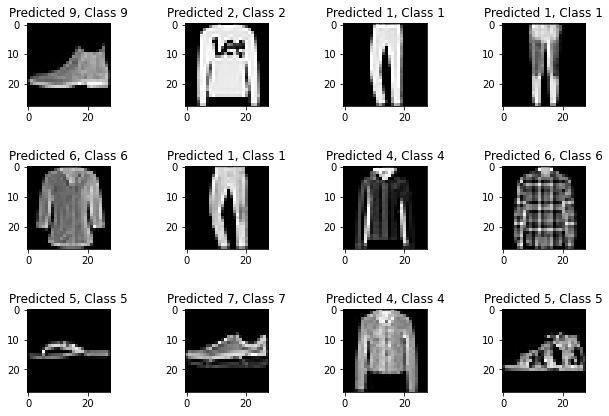

In [184]:
# examples of correctly classified images
plt.figure(figsize= (10,7))
for i, correct in enumerate(correct_indices[:12]):
    plt.subplots_adjust(hspace=.5, wspace=.9)
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
print("Examples of Correctly Classified Items:")

Examples of Inorrectly Classified Items:


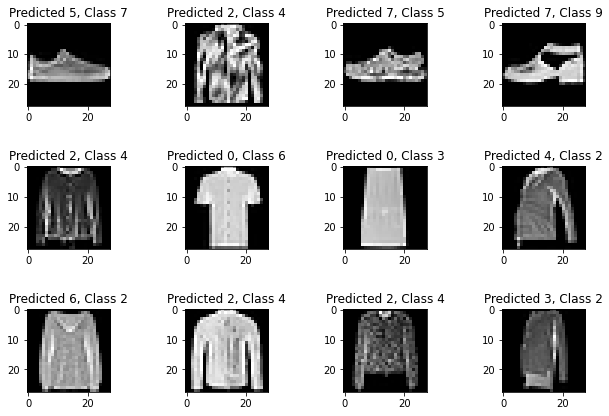

In [185]:
# examples of incorrectly classified images
plt.figure(figsize= (10,7))
for i, incorrect in enumerate(incorrect_indices[:12]):
    plt.subplots_adjust(hspace=0.5, wspace=0.9)
    plt.subplot(3,4,i+1)
    plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

print("Examples of Inorrectly Classified Items:")

# V. Your Task

Your task is to specify a <b>network architecture</b> (i.e., specify the number of <b>hidden layers</b> and number of <b>nodes in each hidden layer</b>) and adjust the hyperparameters (i.e., select values for <b>Dropout rate(s)</b>, <b>batch size</b>, and number of <b>epochs</b>) in order to maximize the `val_accuracy` score.  

How this assignment works is that a series of hidden test cells will be used to reward you the closer you get to a benchmark accuracy score for this data set, with full credit awarded only if you exceed that benchmark.  You don't know what that benchmark is, however, just like in real life.  You'll need to experiment with your model to see how high an `val_accuracy` score you can get.

Here is how the grading will work.  I will take the model you specify in `buildSequentialModel()` (STEP 1, above) and use the hyperparameters `my_batch_size` and `my_epochs` you supply in `myDeepNetworkParameters()`, below, to train and test your model.  This assignment involves several stochastic processes, so to simulate the exact score that the grader will see, you must __clear your kernel and run your notebook exactly <i>once</i>__.  Although the model you fit and evalute in steps 2 and 3 are ignored by the grader, they nevertheless will be run, which means that the pseudorandom processes will be run as well which has an effect on your graded model.  Why? The random seeds ensure that precisely the same sequence of values from the pseudorandom processes will be generated, deterministically.  Since the grader will initialize and run your notebook exactly once, that is the condition under which you must evaluate your model to ensure the result you see is the result passed to the grader. 


<div class="alert alert-block alert-danger">
<b>WARNING:</b> The rules for collaboration will be strictly observed here.

Specifically, YOU ARE NOT ALLOWED to copy one another's parameter settings.  The solution space is large enough that identical values are very unlikely; if they appear we will assume they were copied until you can convince us otherwise. And small pertubations can, and will, be spotted. Do not run the risk of <b>RECEIVING A ZERO</b> the entire assignment: <u>DO YOUR OWN WORK</u>.
</div>

---

After experimenting with architectures and parameter settings to find the best model, in the next cell you will enter  the parameter settings from your best performing deep learning network.    

~~~python
def myDeepNetworkParameters():
    """This function is used for you to explicitly 
        state the hyperparameter settings for the deep 
        learning architecture you specified in 
        buildSequentialModel(). 
        
        Specifically, this function asks you to specify
        the number of epochs and the batch size.
        
        A series of hidden test cells will evaluate your
        replicated test score. 
    """
    global my_batch_size
    global my_epochs
    # TEMPLATE ----
    my_batch_size = ---  # your best model's number of batches 
    my_epochs =  ---    # your best model's number of epochs 
    return my_batchSize, my_epochs

~~~


In [186]:
''' def buildSequentialModel():
    # Build a Sequential Model.
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    
    # YOUR CODE HERE
    model.add(Dense(500, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.1))
    
    model.add(Dense(500, kernel_initializer='normal', activation='relu'))
    model.add(Dropout(0.1))

    # Output Layer
    model.add(Dense(10, activation='softmax'))
   
    return model '''

" def buildSequentialModel():\n    # Build a Sequential Model.\n    model = Sequential()\n    model.add(Flatten(input_shape=(28, 28)))\n    \n    # YOUR CODE HERE\n    model.add(Dense(500, kernel_initializer='normal', activation='relu'))\n    model.add(Dropout(0.1))\n    \n    model.add(Dense(500, kernel_initializer='normal', activation='relu'))\n    model.add(Dropout(0.1))\n\n    # Output Layer\n    model.add(Dense(10, activation='softmax'))\n   \n    return model "

## Instantiate, Compile and Score Your Model

The next cell simply encodes your choice of _batch size_ and number of _epochs_ for training the model you specified with `buildSequentialModel()`.


In [187]:
def myDeepNetworkParameters():
    """This function is used for you to explicitly 
        state the hyperparameter settings for the deep 
        learning architecture you specified in 
        buildSequentialModel(). 
        
        Specifically, this function asks you to specify
        the number of epochs and the batch size.
        
        A series of hidden test cells will evaluate your
        replicated test score.. 
    """
    global my_batch_size
    global my_epochs
    my_batch_size=500
    my_epochs=20

    # YOUR CODE HERE
    return my_batch_size, my_epochs 

<div class="alert alert-block alert-info">
    <b>Instantiate and Compile Your Model: </b> 
    
The next cell calls <b>buildSequentialModel()</b> that you finished  earlier in the assignment.
    
Note that running <b>buildSequentialModel()</b> multiple times <u>will return different values due to the stochastic nature of the algorithm.</u>  Therefore, to ensure that you are aware of the model that will be evaluated, you should <b>Restart and Clear Output</b> and run all cells <b>once</b> to observe the result the graders will evaluate.
 </div>

In [188]:
# instantiate model
model = buildSequentialModel()
# compile model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                loss=keras.losses.SparseCategoricalCrossentropy(),
                metrics=['accuracy'])

<div class="alert alert-block alert-info">
<b>Scoring Your Model:</b>

The next cell fits your model with your parameters.  This is followed by a cell that returns the `val_accuracy` score that will be passed to the graders (when the notebook is run once). Finally, your score is passed through a sequence of test cells, starting with a minimal validation accuracy of 0.84.  The higher your val_accuracy score, the more points you will earn.  
    
Good luck! 
</div>

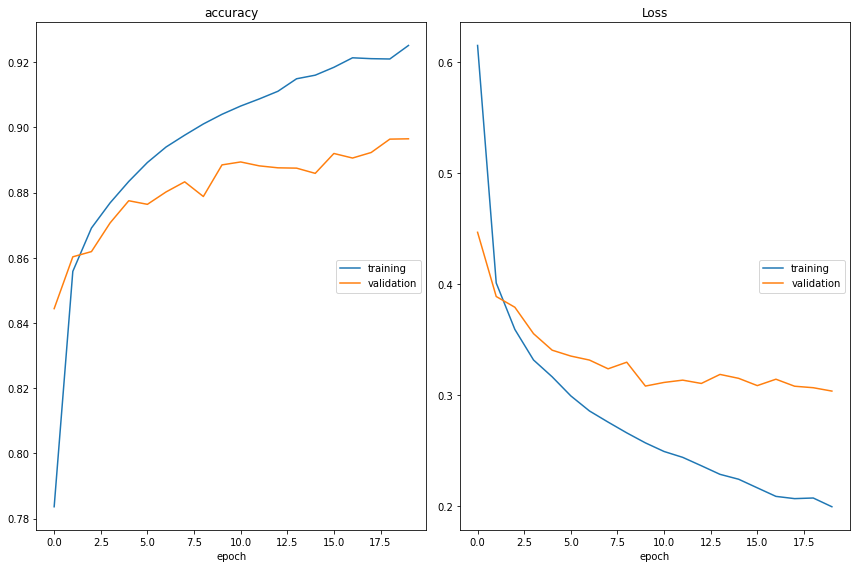

accuracy
	training         	 (min:    0.784, max:    0.925, cur:    0.925)
	validation       	 (min:    0.844, max:    0.896, cur:    0.896)
Loss
	training         	 (min:    0.199, max:    0.615, cur:    0.199)
	validation       	 (min:    0.304, max:    0.447, cur:    0.304)


In [189]:
myDeepNetworkParameters()
print("Your submitted parameter settings: my_batch_size = %s, and my_epochs = %s." % (my_batch_size, my_epochs))
model.fit(X_train, y_train, 
          callbacks=[PlotLossesKeras()],  # plots accuracy and loss
          batch_size=my_batch_size, 
          epochs=my_epochs, 
          verbose=0,                      # change verbose to 1 to see each sequence
          validation_data=(X_test, y_test))

In [190]:
print("Your val_accuracy score is {}".format(model.evaluate(X_test, y_test, verbose=0)[1]))

Your val_accuracy score is 0.8964999914169312


In [191]:
# Test cell 2
# Is your val_accuracy >= 0.84?
print(model.evaluate(X_test, y_test, verbose=0)[1] >= 0.84)

True


In [192]:
# Test cell 3

In [193]:
# Test cell 4

In [194]:
# Test cell 5

In [195]:
# Test cell 6

In [196]:
# Test cell 7

In [197]:
# Test cell 8

In [198]:
# Test cell 9

In [199]:
# Test cell 10

In [200]:
# Test cell 11

Before turning this problem in remember to do the following steps and validate:

0. **Remove any print statements you added**
1. **Restart the kernel** (Kernel $\rightarrow$ Restart)
2. **Run all cells** (Cell $\rightarrow$ Run All)
3. **Save** (File $\rightarrow$ Save and Checkpoint)